## Кутдусов Руслан 

##### Условие

Приведены данные о численности населения Индонезии по годам с 1950 -2000 г.г. Заполнить последние два столбца таблицы (взять сведения из интернета).  На основе этих данных построить наилучший многочлен  по МНК.  Найти численность  населения Индонезии  в 2019 году  и сравнить полученное значение  с актуальным значением  (взять из интернета).
Решить ту же  задачу на основе интерполяционного многочлена.  То есть построить интерполяционный многочлен по значениям с 1950-2020 г.г. Вычислить значение  для 2019 года и сравнить с актуальными данными.  Составить отчет по задаче.

In [1]:
import pandas as pd

In [2]:
pd.read_csv('indonesia.tsv', sep = '\t', index_col = 0)

,1950,1960,1970,1980,1990,2000,2010,2020
Страна,,,,,,,,
Индонезия,77,98.5,124,148.5,184,228,237.6,275.6


In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg, interpolate

### МНК

In [4]:
x = np.array([10 * i for i in range(8)], dtype = 'uint64') # 1950 соответствует 0, 1960 - 10, ..., 2020 - 70
x

array([ 0, 10, 20, 30, 40, 50, 60, 70], dtype=uint64)

In [5]:
y = np.array([77, 98.5, 124, 148.5, 184, 228, 237.6, 275.6])
y

array([ 77. ,  98.5, 124. , 148.5, 184. , 228. , 237.6, 275.6])

In [6]:
def MNK (n):
    G = np.array([[sum(x[i] ** (k + j) for i in range(8)) for k in range(n)] for j in range(n)])
    b = np.array([sum(y[i] * (x[i] ** k) for i in range(8)) for k in range(n)])
    a = linalg.solve(G, b)
    return a

In [7]:
def P_mnk(x, n):
    a = MNK(n)
    return sum(a[i] * x ** i for i in range(n))

<ipython-input-6-3b427c8eae55>:4: LinAlgWarning: Ill-conditioned matrix (rcond=2.32562e-19): result may not be accurate.
  a = linalg.solve(G, b)


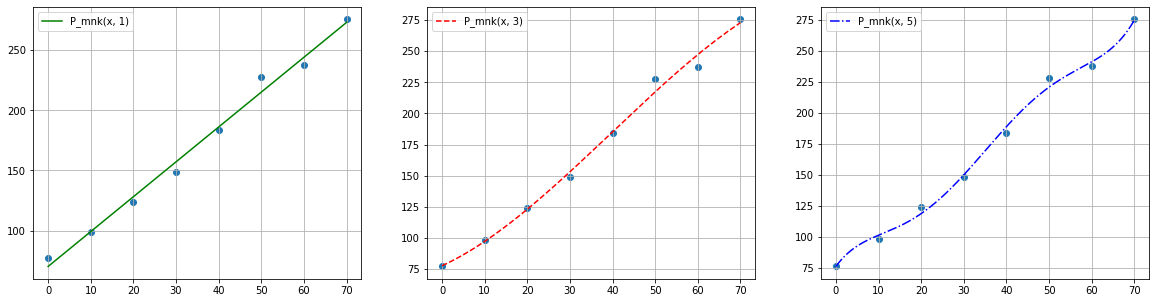

In [8]:
z = np.linspace(0, 70, 1000)
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].plot(z, P_mnk(z, 2), 'g',label = 'P_mnk(x, 1)')
axs[1].plot(z, P_mnk(z, 4), '--r',label = 'P_mnk(x, 3)')
axs[2].plot(z, P_mnk(z, 6), '-.b',label = 'P_mnk(x, 5)')
axs[0].scatter(x, y)
axs[1].scatter(x, y)
axs[2].scatter(x, y)
axs[0].grid()
axs[1].grid()
axs[2].grid()
axs[0].legend()
axs[1].legend()
axs[2].legend()

###### Численность населения в 2019

In [9]:
P_mnk(69, 2), P_mnk(69, 4),  P_mnk(69, 6) # многочлены 1-ой, 3-ой и 5-ой

<ipython-input-6-3b427c8eae55>:4: LinAlgWarning: Ill-conditioned matrix (rcond=2.32562e-19): result may not be accurate.
  a = linalg.solve(G, b)


(270.1366666666667, 270.58657380952326, 269.3165088416831)

Численность по статистике - 269.2 млн

Апроксимация дала приближённый результат. Ближе всего к истине - приближение многочленом 5-ой степени.

### Интепроляция

In [10]:
P_inter = interpolate.interp1d(x, y, kind = 'cubic')

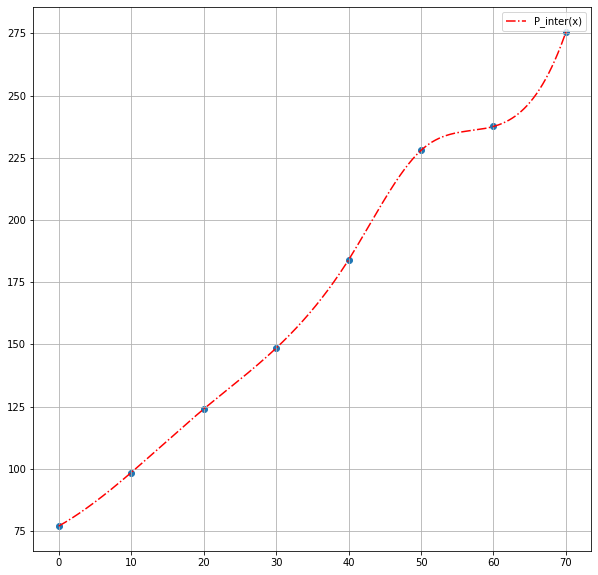

In [11]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.grid()
ax.scatter(x, y)
ax.plot(z, P_inter(z), '-.r',label = 'P_inter(x)')
ax.legend()

###### Численность населения в 2019

In [12]:
print(P_inter(69))

267.85262727272726


Численность по статистике - 269.2 млн.

Интерполяция дала приближённый результат.